# Viral Social Media Trends and Engagement Analysis  
**Author:** Manjil Rawal  



## Importing Libraries  

First, I will import the libraries I'll be using. These help with data handling and making charts.

In [20]:
# pandas and numpy for data work
import pandas as pd
import numpy as np

# matplotlib for making plots
import matplotlib.pyplot as plt

# show plots directly in notebook
%matplotlib inline

Loading the CSV file and checking out what's in the dataset.

In [21]:
file_path = "Viral_Social_Media_Trends.csv"

# read CSV
df = pd.read_csv(file_path)

# check size
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# look at first few rows
df.head()

Number of rows: 5000
Number of columns: 10


,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


Let me take a closer look at what types of data we have and get some basic stats.

In [22]:
# data types and missing values
print("### Data Info")
df.info()

print("\n### Descriptive Statistics for Numeric Columns")
display(df.describe())

# checking unique values for categories
print("\n### Example: Unique values in some categorical columns")
for col in ["Platform", "Hashtag", "Content_Type", "Region", "Engagement_Level"]:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



### Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB

### Descriptive Statistics for Numeric Columns


,Views,Likes,Shares,Comments
count,"5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,494,066.44","251,475.03","50,519.56","24,888.39"
std,"1,459,489.82","144,349.58","29,066.36","14,284.50"
min,"1,266.00",490.00,52.00,18.00
25%,"1,186,207.25","126,892.25","25,029.00","12,305.25"
50%,"2,497,373.00","249,443.00","50,839.50","25,004.00"
75%,"3,759,781.00","373,970.75","75,774.25","37,072.75"
max,"4,999,430.00","499,922.00","99,978.00","49,993.00"



### Example: Unique values in some categorical columns

Column: Platform
Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

Column: Hashtag
Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64

Column: Content_Type
Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtype: int64

Column: Region
Region
USA          677
Canada       658
UK           647
Brazil       641
India        617
Australia    602
Japan        592
Germany      566
Name: count, dtype: int64

Column: Engagement_Level
Engagement_Level
Low       1729
High      1673
Medium    1598
Name: count, dtype: int64


###  Missing Values and Duplicates  

Checking if there's any missing data or duplicates that need cleaning.  


In [23]:
# Check for missing values in each column
print("### Missing Values Per Column")
print(df.isna().sum())

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)


### Missing Values Per Column
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

Number of duplicate rows: 0




No missing values or duplicates found. The data is pretty clean already.

The data looks good but I want to create a new column that makes it easier to compare engagement across posts with different view counts.

**Engagement_Rate** = (Likes + Shares + Comments) / Views

This way we can see which posts got the most interaction relative to how many people saw them.# creating engagement rate column


In [24]:
# creating engagement rate column
df['Engagement_Rate'] = (df['Likes'] + df['Shares'] + df['Comments']) / df['Views']

# cap really high values at 3 for cleaner plots
df['Engagement_Rate_Capped'] = df['Engagement_Rate'].clip(upper=3)

# quick stats on the new column
df['Engagement_Rate'].describe()


count   5,000.00
mean        0.57
std         4.86
min         0.00
25%         0.08
50%         0.13
75%         0.27
max       281.74
Name: Engagement_Rate, dtype: float64

**Observation:**  

- Most posts have an engagement rate well below 1 (i.e., less than one interaction per view).  
- A few posts show extremely high engagement rates because they have very high interactions but relatively low views (these behave as outliers).  
- For visualizations, I use a **capped engagement rate** column to prevent a few extreme values from dominating the scale.


##  Visualizations  

In this section, I build several visualizations to understand:  

1. How many posts each platform has  
2. How views are distributed overall  
3. How average engagement differs by content type  
4. How engagement varies across platforms  

Each plot is followed by a short interpretation.


###  Number of Posts by Platform  

This bar chart shows how many viral posts come from each platform in the dataset.


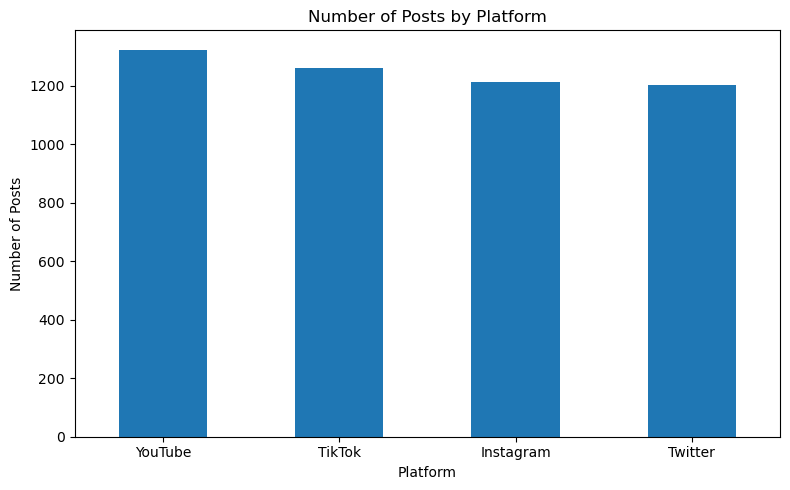

In [25]:
# Count number of posts per platform
platform_counts = df["Platform"].value_counts()

plt.figure(figsize=(8, 5))
platform_counts.plot(kind="bar")
plt.title("Number of Posts by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretation:**  

From this chart, we can see which platforms contribute the largest share of viral posts in the dataset (for example, whether TikTok or YouTube dominates).  
This helps us understand the relative representation of each platform.


###  Distribution of Views  

The next plot shows how views are distributed across all posts. Because views can be very skewed, I plot both the raw views and their logarithm.


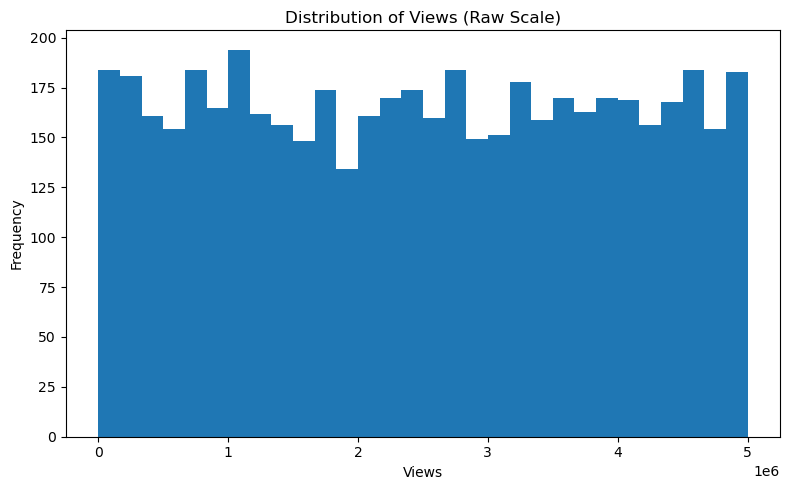

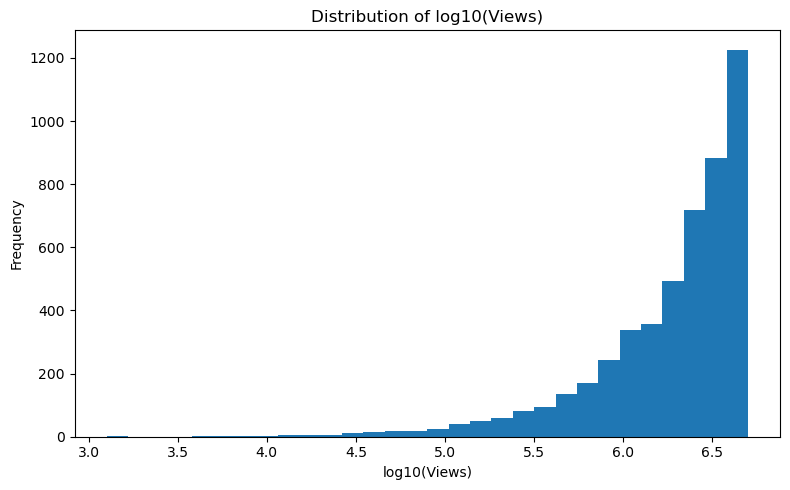

In [26]:
# Histogram of raw views
plt.figure(figsize=(8, 5))
plt.hist(df["Views"], bins=30)
plt.title("Distribution of Views (Raw Scale)")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Histogram of log10(views) to reduce skewness
plt.figure(figsize=(8, 5))
log_views = np.log10(df["Views"])
plt.hist(log_views, bins=30)
plt.title("Distribution of log10(Views)")
plt.xlabel("log10(Views)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Interpretation:**  

- The raw view counts are right-skewed: most posts have moderate view counts, while a smaller number of posts go extremely viral.  
- The log-transformed distribution is much closer to normal, which is useful if we later want to build statistical models.


###  Average Engagement Rate by Content Type  

Here I compare the **average capped engagement rate** across different content types (e.g., Video, Shorts, Live Stream, Post, etc.).


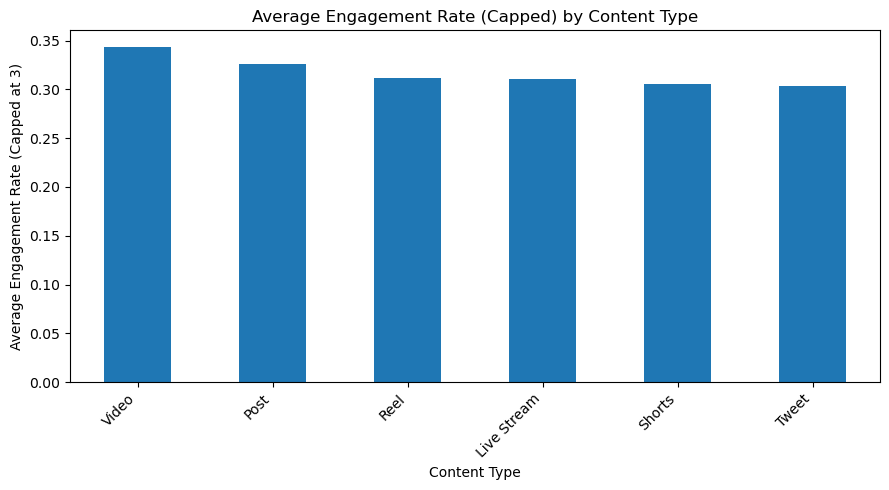

In [27]:
# Compute mean capped engagement rate by content type
engagement_by_content = df.groupby("Content_Type")["Engagement_Rate_Capped"].mean().sort_values(ascending=False)

plt.figure(figsize=(9, 5))
engagement_by_content.plot(kind="bar")
plt.title("Average Engagement Rate (Capped) by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Engagement Rate (Capped at 3)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Interpretation:**  

- Certain content types (for example, short-form or interactive formats) may show higher average engagement relative to their views.  
- This kind of insight can guide creators toward formats that typically generate more interaction per view.


###  Average Engagement Rate by Platform  

Comparing how different platforms perform in terms of engagement.

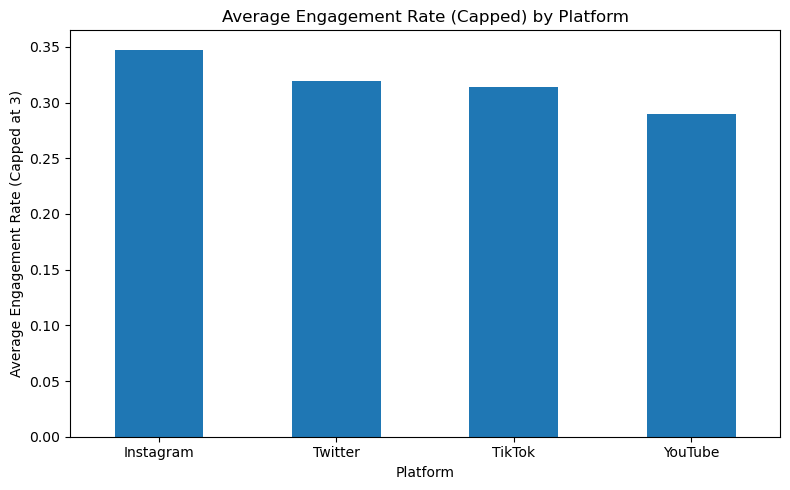

In [28]:
# Compute mean capped engagement rate by platform
engagement_by_platform = df.groupby("Platform")["Engagement_Rate_Capped"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
engagement_by_platform.plot(kind="bar")
plt.title("Average Engagement Rate (Capped) by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Engagement Rate (Capped at 3)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Instagram shows the highest engagement rate, meaning people interact more relative to views. YouTube has the lowest. This could be because YouTube is more about watching and less about quick interactions compared to Instagram.

##  Conclusion  

In this notebook, I:

1. Imported the libraries needed for data analysis and visualization.  
2. Loaded the viral social media trends dataset and reviewed its structure.  
3. Checked for missing values and duplicates, confirming that the dataset is already clean.  
4. Engineered a new **Engagement_Rate** feature to better compare posts with different view counts.  
5. Created visualizations to understand how posts and engagement are distributed across platforms and content types.  

These steps provide a clear starting point for deeper analysis, such as building predictive models or running hypothesis tests about which factors drive viral engagement.
